In [1]:
import torch as T
import torch.nn as NN
import torch.nn.functional as F
import models
import losses
from util import *
import numpy.random as RNG
from datasets import MNISTMulti

In [2]:
mnist = MNISTMulti('.', n_digits=1, backrand=128, image_rows=70, image_cols=70)
batch_size = 32
mnist_dataloader = T.utils.data.DataLoader(mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [3]:
mnist.train_data.size()

torch.Size([60000, 70, 70])

torch.Size([60000, 1, 4])
[3]


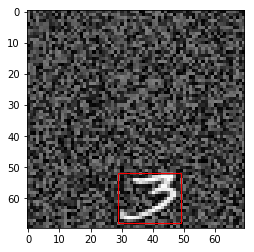

In [4]:
import matplotlib.pyplot as PL
i = 2500
PL.imshow(mnist.train_data[i].numpy(), cmap='gray')
print(mnist.train_locs.size())
addbox(PL.gca(), mnist.train_locs[i, 0].numpy(), 'red')
#addbox(PL.gca(), mnist.train_locs[i, 1].numpy(), 'red')
#addbox(PL.gca(), mnist.train_locs[i, 2].numpy(), 'red')
print(mnist.train_labels[i].numpy())
PL.show()

In [9]:
model = models.SequentialGlimpsedClassifier()
opt = T.optim.Adam(model.parameters())
loss_fn = losses.RLClassifierLoss()
ones = T.ones(batch_size, 10).long()

print(dict(model.named_parameters()).keys())

for epoch in range(1):
    for i, (x, _y, B) in enumerate(mnist_dataloader):
        batch_size, n_rows, n_cols = x.size()
        y = T.LongTensor(batch_size, 10).zero_().scatter_add_(1, _y, ones)
        x = tovar(x.float() / 255)
        y = tovar(y)
        B = tovar(B)
        for j in range(1000000):
            y_hat, y_hat_logprob, p, p_logprob = model(x.unsqueeze(1).expand(batch_size, 3, n_rows, n_cols))
            loss = loss_fn(y, y_hat, y_hat_logprob, p, p_logprob)
            opt.zero_grad()
            loss.backward()
            grad_clip(model.parameters(), 1)
            opt.step()
            if j % 100 == 0:
                print(epoch, i, tonumpy(loss_fn.r).sum(1).mean(), tonumpy(loss))
                if j % 1000 == 0:
                    print('_y', tonumpy(_y).squeeze())
                    print('y_hat', tonumpy(y_hat)[:, :, 0].squeeze())
                    print('p', tonumpy(p)[:, :, 0].squeeze())

dict_keys(['cnn.0.weight', 'cnn.0.bias', 'cnn.2.weight', 'cnn.2.bias', 'cnn.4.weight', 'cnn.4.bias', 'lstm.weight_ih', 'lstm.weight_hh', 'lstm.bias_ih', 'lstm.bias_hh', 'proj_y.0.weight', 'proj_y.0.bias', 'proj_y.2.weight', 'proj_y.2.bias', 'proj_p.0.weight', 'proj_p.0.bias', 'proj_p.2.weight', 'proj_p.2.bias', 'proj_B.0.weight', 'proj_B.0.bias', 'proj_B.2.weight', 'proj_B.2.bias', 'y_in.weight'])
0 0 -3.6875 [-0.4380488]
_y [6 3 6 3 3 0 6 2 8 7 4 4 3 9 4 1 2 3 4 0 6 0 5 2 2 7 0 4 3 1 6 1]
y_hat [[3 3 6 6 0 3 4 7 8 4]
 [8 0 7 8 9 0 0 8 5 5]
 [2 4 9 3 8 9 6 4 7 9]
 [0 9 9 8 2 3 5 9 3 3]
 [1 5 6 9 0 2 3 6 9 8]
 [7 5 3 5 3 1 3 0 9 5]
 [1 7 5 8 4 3 2 0 5 2]
 [4 8 3 5 6 1 0 7 8 7]
 [6 1 9 7 1 4 4 8 9 0]
 [9 7 7 4 0 4 4 8 5 6]
 [2 2 1 0 8 2 3 5 4 0]
 [0 1 3 5 0 4 1 5 4 0]
 [6 5 0 5 0 2 6 3 8 0]
 [4 4 8 9 3 2 4 2 7 9]
 [2 9 3 6 5 3 0 9 1 6]
 [5 5 8 8 9 4 5 4 6 1]
 [2 4 8 7 5 1 6 1 0 8]
 [7 3 0 8 1 3 3 6 6 0]
 [8 1 2 4 5 9 5 4 0 1]
 [8 8 3 9 1 4 7 3 7 0]
 [4 4 0 6 8 4 0 7 2 9]
 [6 3 9 5 5 8 7 

0 0 -0.625 [8.530151e-10]
0 0 -0.625 [8.6365615e-10]
0 0 -0.625 [5.857146e-10]
0 0 -0.625 [7.258677e-10]
0 0 -0.625 [7.1677275e-10]
0 0 -0.625 [9.641553e-10]
0 0 -0.625 [1.0802979e-09]
0 0 -0.625 [1.0875738e-09]
0 0 -0.625 [1.2323653e-09]
0 0 -0.625 [1.1143129e-09]
_y [6 3 6 3 3 0 6 2 8 7 4 4 3 9 4 1 2 3 4 0 6 0 5 2 2 7 0 4 3 1 6 1]
y_hat [[3 3 3 3 2 3 0 0 6 7]
 [3 3 3 0 0 4 2 3 3 3]
 [3 3 3 3 6 0 3 6 1 0]
 [3 3 6 6 5 2 0 7 0 4]
 [3 3 4 3 3 2 3 2 6 3]
 [3 3 3 3 3 3 3 3 3 8]
 [3 0 3 3 3 0 8 3 3 3]
 [3 3 3 7 6 3 6 2 2 0]
 [3 3 7 2 4 0 3 3 3 3]
 [3 6 6 0 3 3 0 3 3 3]
 [3 3 3 6 0 3 3 6 5 9]
 [3 1 7 6 3 0 0 3 9 6]
 [3 3 3 1 9 4 3 3 3 3]
 [3 3 3 3 3 7 3 3 6 3]
 [3 3 7 3 0 3 3 6 6 3]
 [3 3 3 3 3 2 2 9 1 6]
 [3 3 6 3 6 0 7 3 9 2]
 [3 6 9 0 3 2 6 0 0 6]
 [3 3 3 3 0 6 3 4 3 3]
 [3 3 3 0 3 3 0 1 3 3]
 [3 0 3 2 1 6 3 4 1 7]
 [3 0 7 7 0 3 0 6 3 3]
 [3 3 0 0 0 0 3 3 3 0]
 [3 3 3 3 3 4 4 0 3 2]
 [3 3 3 3 8 3 0 3 3 3]
 [3 3 0 3 3 9 6 0 0 3]
 [3 3 3 3 0 3 3 3 6 3]
 [3 3 2 6 3 3 9 3 3 3]
 [3 0 3 3 3 3 6

KeyboardInterrupt: 